In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [5]:
# Generate summary statistics
df_market_data.dtypes

price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
dtype: object

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']])

market_data_scaled[0:3]                                                                   



array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051]])

In [7]:
# Create a DataFrame with the scaled data
market_data_transformed = pd.DataFrame(
    market_data_scaled, 
    columns=['price_change_percentage_24h', 
             'price_change_percentage_7d', 
             'price_change_percentage_14d', 
             'price_change_percentage_30d', 
             'price_change_percentage_60d', 
             'price_change_percentage_200d', 
             'price_change_percentage_1y'])


# Copy the crypto names from the original DataFrame
market_data_transformed["coin_id"] = df_market_data.index

# Set the coin_id column as index
market_data_transformed = market_data_transformed.set_index("coin_id")

# Display the scaled DataFrame
market_data_transformed.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values from 1 to 11
data = []
k = list(range(1, 11))

In [9]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(market_data_scaled)
    inertia.append(model.inertia_)
    


c:\Users\lance\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lance\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lance\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lance\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

In [10]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_original = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_original = pd.DataFrame(elbow_data_original)

df_elbow_original.head()

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780


In [11]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow_original.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve original",
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** k4 or k5 would be the best to use

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [12]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [13]:
# Fit the K-Means model using the scaled DataFrame
model.fit(market_data_transformed)

c:\Users\lance\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
kmeans_predictions = model.predict(market_data_transformed)

# Print the resulting array of cluster values.
print(kmeans_predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [15]:
# Create a copy of the scaled DataFrame
market_data_predictions_df = market_data_transformed.copy()

In [16]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
market_data_predictions_df['CoinCluster'] = kmeans_predictions

# Display the copy of the scaled DataFrame
market_data_predictions_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,CoinCluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [33]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
market_data_predictions_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="CoinCluster",
    title="PCA Plot original",
    hover_cols=["coin_id"
])

:NdOverlay   [CoinCluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [19]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
market_data_scaled_pca = pca.fit_transform(market_data_scaled)

# View the scaled PCA data
market_data_scaled_pca[5:]

array([[-0.51653377,  1.38837748,  0.80407131],
       [-0.45071134,  0.51769912,  2.84614316],
       [-0.34559977,  0.72943939,  1.47801284],
       [-0.64946792,  0.43216514,  0.60030286],
       [-0.75901394, -0.20119979, -0.21765292],
       [-0.24819846, -1.37625159, -1.46202571],
       [-0.43840762, -0.17533654, -0.6633884 ],
       [-0.69342533, -0.47381462, -0.52759693],
       [ 0.06049915,  2.90940385,  1.49857131],
       [-0.39335243, -0.10819197, -0.01275608],
       [-0.79617564, -0.49440875,  1.08281169],
       [ 0.06407452, -1.26982514, -1.09882928],
       [-0.48901506, -0.73271912, -0.06254323],
       [-0.3062723 ,  0.70341515,  1.71422359],
       [-0.51352775, -0.14280239, -0.65656583],
       [-0.36212044, -0.98691441, -0.72875232],
       [-0.60426463,  0.82739764,  0.43931594],
       [-0.4132956 , -0.67411527, -1.07662834],
       [-0.40748304, -0.21250655, -0.35142563],
       [ 0.60897382,  0.56353212, -1.14874159],
       [-0.45021114, -0.15101945, -0.647

In [20]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** About 89.5% of the total variance is condensed into the 3 PCA variables

In [21]:
# Create a new DataFrame with the PCA data.
market_data_pca_df = pd.DataFrame(
    market_data_scaled_pca,
    columns=["PCA1", "PCA2", "PCA3"]
)

# Copy the crypto names from the original scaled DataFrame

market_data_pca_df["coin_id"] = market_data_transformed.index

# Set the coin_id column as index
market_data_pca_df = market_data_pca_df.set_index("coin_id")


# Display the scaled PCA DataFrame
market_data_pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [22]:
# Create a list with the number of k-values from 1 to 11
data = []
k = list(range(1, 11))

In [23]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list# Create a for loop to compute the inertia with each possible value of k

for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(market_data_pca_df)
    inertia.append(model.inertia_)




c:\Users\lance\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lance\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lance\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lance\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

In [24]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k, "inertia": inertia}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca= pd.DataFrame(elbow_data_pca)
# Display the DataFrame
df_elbow_pca.head()

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314


In [34]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve PCA", 
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 or 5


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No it doesn't appears to be the same

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [26]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [27]:
# Fit the K-Means model using the PCA data
model.fit(market_data_pca_df)

c:\Users\lance\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [28]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
k_4 = model.predict(market_data_pca_df)

# Print the resulting array of cluster values.
k_4[10:]

array([0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 0, 3, 0, 0, 0, 0])

In [29]:
# Create a copy of the scaled PCA DataFrame
market_predictions_df = market_data_pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
market_predictions_df["CoinCluster"] = k_4

# Display the copy of the scaled PCA DataFrame
market_predictions_df.head()

,PCA1,PCA2,PCA3,CoinCluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [30]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
market_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="CoinCluster",
    hover_cols=["coin_id"
])

:NdOverlay   [CoinCluster]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

c:\Users\lance\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lance\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lance\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lance\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

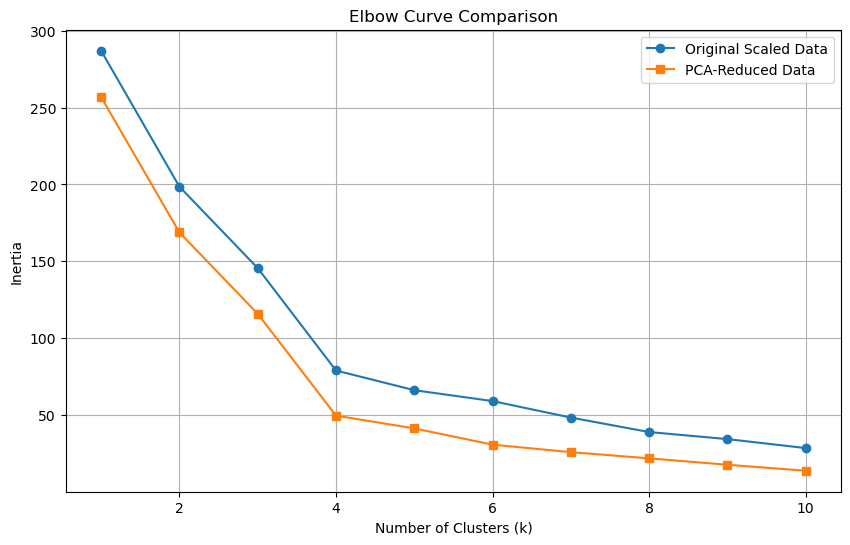

In [31]:
# Composite plot to contrast the Elbow curves
# Elbow curve for original scaled data
inertia_original = []
k_range = range(1, 11)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(market_data_transformed)
    inertia_original.append(model.inertia_)

# Elbow curve for PCA-reduced data
inertia_pca = []
for k in k_range:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(market_data_pca_df)
    inertia_pca.append(model.inertia_)

# Composite plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_original, marker='o', label='Original Scaled Data')
plt.plot(k_range, inertia_pca, marker='s', label='PCA-Reduced Data')
plt.title('Elbow Curve Comparison')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
composite_elbow = df_elbow_original + df_elbow_pca
composite_elbow

,k,inertia
0,2,543.874086
1,4,367.383714
2,6,261.553824
3,8,128.687932
4,10,107.575094
5,12,89.935712
6,14,74.321771
7,16,60.884524
8,18,52.121294
9,20,42.412301


In [ ]:
# Composite plot to contrast the clusters
original_plot = market_data_predictions_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="CoinCluster",
    hover_cols=["coin_id"],
    title="Clusters using Original Scaled Features"
)


# PCA feature cluster plot
pca_plot = market_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="CoinCluster",
    hover_cols=["coin_id"],
    title="Clusters using PCA-Reduced Features"
)

# Composite side-by-side plot
(original_plot + pca_plot).cols(2)

:Layout
   .NdOverlay.I  :NdOverlay   [CoinCluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [CoinCluster]
      :Scatter   [PCA1]   (PCA2,coin_id)

In [ ]:
composite_clusters = original_plot + pca_plot
composite_clusters

:Layout
   .NdOverlay.I  :NdOverlay   [CoinCluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [CoinCluster]
      :Scatter   [PCA1]   (PCA2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** With PCA, the majority of the data points are more closely clustered, both for individual points as well as the two dominant clusters (red and blue), but tezos (cluster 3) appears mixed with cluster 0. Both of the outlier points (green and yellow) are easily identified as such under PCA, but celsius-degree-token (green) appears mixed with cluster 0 in the full data plot. Further, since PCA loses the definition of the features, it is more difficult to draw conclusions about the meaning of the data points. Therefore, PCA is a mix of pros and cons and not strongly weighted in either direction, so either format could be used with similar results.